In [56]:
%matplotlib inline

import sys
import csv
import random
import ROOT as r
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as clr

from sklearn.datasets import make_gaussian_quantiles
from datetime import datetime
from scipy.sparse import csr_matrix
from sklearn import datasets, svm, metrics
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from root_numpy import tree2rec, tree2array

# Write script to visualize the time array, use charge as diameter of increasing circles
# Plot a handful from each

In [124]:
f1 = r.TFile('gammasim.root')
f2 = r.TFile('protonsim.root')

g_tree = f1.Get("XCDF")
p_tree = f2.Get("XCDF")

a = tree2array(g_tree)
b = tree2array(p_tree)

g_xPMT   = a['event.hit.xPMT']
g_yPMT   = a['event.hit.yPMT']
g_charge = a['event.hit.charge']
g_time   = a['event.hit.time']

p_xPMT   = a['event.hit.xPMT']
p_yPMT   = a['event.hit.yPMT']
p_charge = a['event.hit.charge']
p_time   = a['event.hit.time']

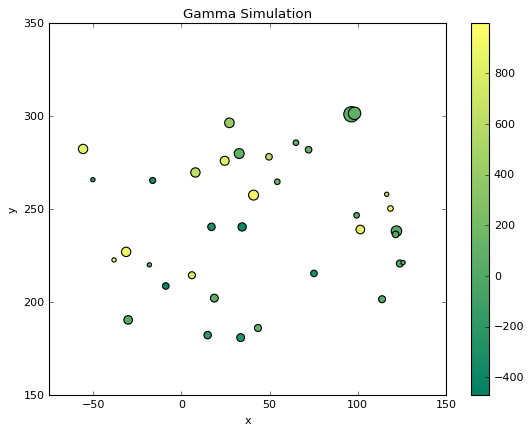

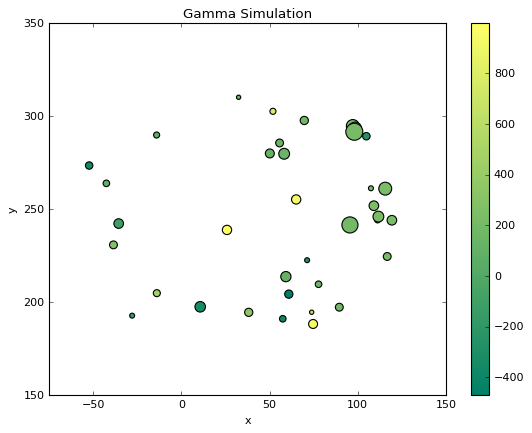

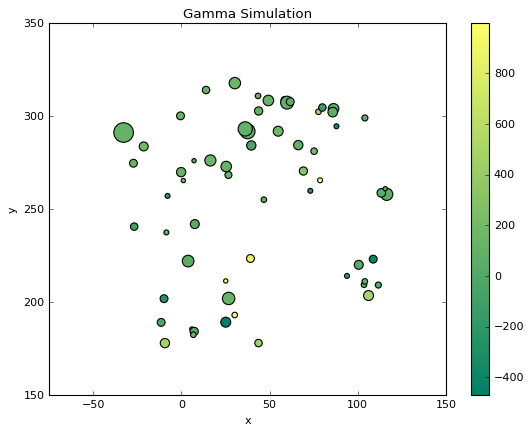

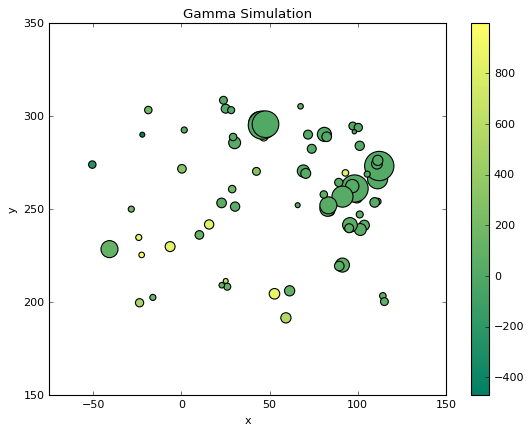

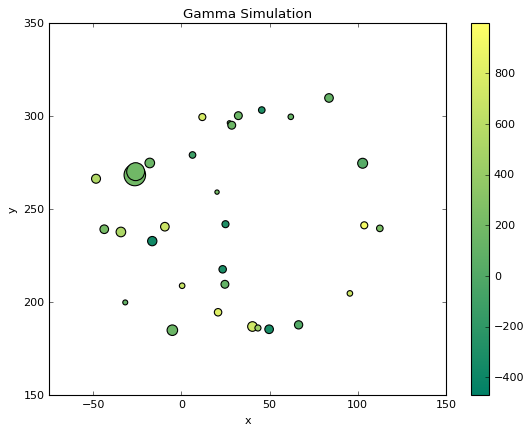

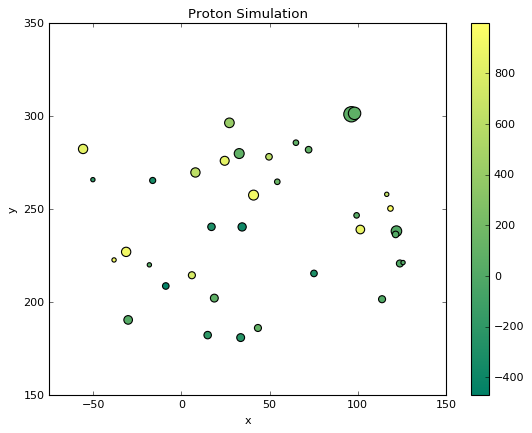

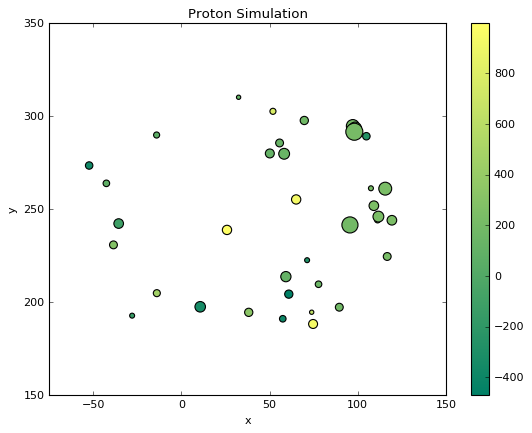

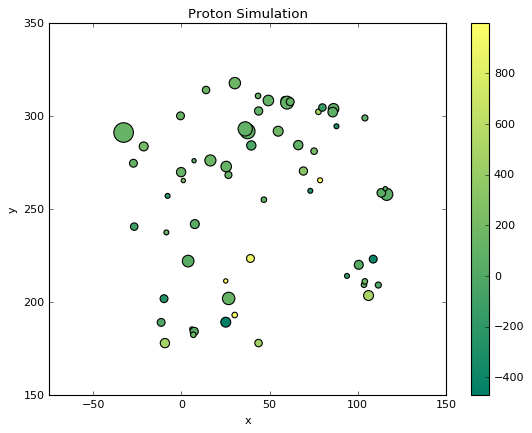

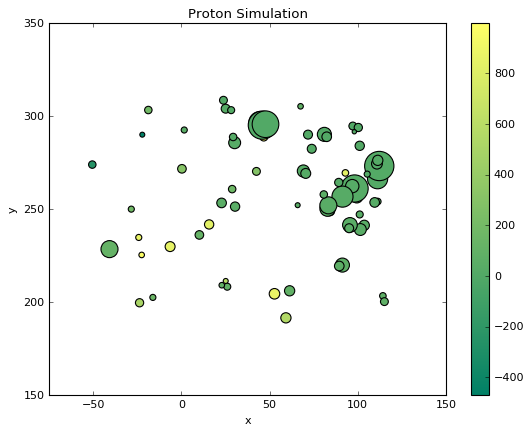

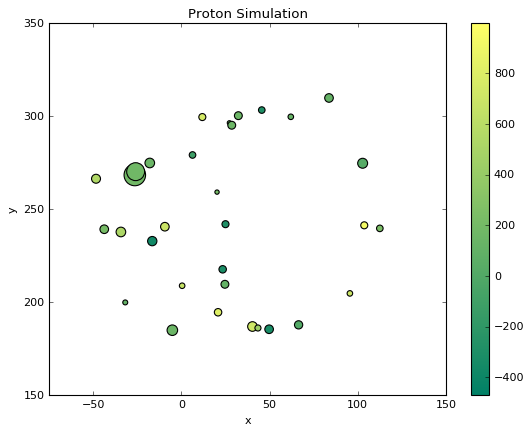

In [115]:
# g_xmin, g_xmax = g_xPMT.min() - 1, g_xPMT.max() + 1
# g_ymin, g_ymax = g_yPMT.min() - 1, g_yPMT.min() + 1
# g_time_i, g_time_f = g_time.min() - 1, g_time.max() + 1

all_time = np.concatenate((g_time[0], g_time[1]))
all_time = np.concatenate((all_time, g_time[2]))
all_time = np.concatenate((all_time, g_time[3]))
all_time = np.concatenate((all_time, g_time[4]))

for i in range(5):
    plt.figure(figsize = (8, 6))
    plt.scatter(g_xPMT[i], g_yPMT[i], c = g_time[i], s = g_charge[i] * 50, vmin = all_time.min(), vmax = all_time.max())
    plt.xlim(-75, 150)
    plt.ylim(150, 350)
    plt.summer()
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Gamma Simulation') 
    plt.colorbar()
    plt.show()
    
for j in range(5):
    plt.figure(figsize = (8, 6))
    plt.scatter(p_xPMT[j], p_yPMT[j], c = p_time[j], s = p_charge[j] * 50, vmin = all_time.min(), vmax = all_time.max())
    plt.xlim(-75, 150)
    plt.ylim(150, 350)
    plt.summer()
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Proton Simulation')
    plt.colorbar()
    plt.show()

In [127]:
# Create data processing function

def gamma_data(x, y, charge, time):
    
    x_index = x
    y_index = y
    
    x_min = np.abs(x.min())
    y_min = np.abs(y.min())
    
    for i in range(len(x)): 
        x_index[i] += (np.abs(x.min()) + 10)
        y_index[i] -= ((y.min()))
            
    return(x_index, y_index)

In [128]:
all_images = np.zeros((n_events * 2, 20, 20))

x = g_xPMT[0]
y = g_yPMT[0]
charge = g_charge[0]
time = g_time[0]

x_index, y_index = gamma_data(x, y, charge, time)
print(x_index)
print(y_index)

[ 209.643  211.425  207.682  207.219  204.296  202.179  181.689  180.833
  182.157  183.939  199.53   187.214  185.095  157.882  150.694  160.925
  140.121  135.42   126.661  118.529  112.971  120.188  110.3    129.152
  119.357  102.801   93.705  104.425  100.646   91.697   69.462   76.894
   67.587   54.416   55.559   47.56    35.558   30.   ]
[   0.     181.363  198.258  196.489  210.435  218.047  259.296  262.38
  261.087  261.58   161.655  199.125  206.735  242.035  245.799  175.519
  224.797  238.221  217.628  239.967  256.481  200.519  236.071  146.185
  141.022  200.563  229.797  162.247  142.358  174.537  225.492  168.759
  180.132  187.108  150.527  182.763  225.925  242.44 ]


In [31]:
n_events = 300 # Each event actually produces one gamma ray shower and one cosmic ray shower as per the for loop below,
n_pmt = 60     # meaning the total number of events will be twice the input value n_events

targets = np.arange(0, 2, 1)
increment_targets = np.arange(0, 2, 1)
all_images = np.zeros((n_events * 2, 72, 72))
print(all_images.shape)

for i in range(n_events):
    gamma, ray_1 = make_gaussian_quantiles(mean = (10,10), cov = 1.2,
                                             n_samples = n_pmt, n_features = 2,
                                             n_classes = 1, random_state = i) 

    cosmic, ray_2 = make_gaussian_quantiles(mean = (9, 9), cov = 1.4,
                                             n_samples = n_pmt, n_features = 2,
                                             n_classes = 1, random_state = i + 2) 

    # This is slightly confusing, make_gaussian_quantiles defines the variable x as an n x 2 matrix of x, y coordinates
    # Now, I'm simply separating that matrix into two arrays: one array of x coordinates, one array of y coordinates

    gammax_array = gamma[:, 0]
    gammay_array = gamma[:, 1]

    cosmicx_array = cosmic[:, 0]
    cosmicy_array = cosmic[:, 1]

    detection = np.arange(0, n_pmt, 1)

    # At some point, ask Udara on what grid system HAWC is built.  Hopefully, the origin is not in the center. 
    # I think I can define it myself... 

    for j in range(n_pmt):
        detection[j] = 1
        gammax_array[j] = "{0:0f}".format(gammax_array[j])
        gammay_array[j] = "{0:0f}".format(gammay_array[j])
        cosmicx_array[j] = "{0:0f}".format(cosmicx_array[j])
        cosmicy_array[j] = "{0:0f}".format(cosmicy_array[j])

    print(gammax_array)
    pixels = np.arange(0, 72, 1)
    gammax_indeces = gammax_array * 4
    gammay_indeces = gammay_array * 4
    cosmicx_indeces = cosmicx_array * 4
    cosmicy_indeces = cosmicy_array * 4
    
    all_indeces = [gammax_indeces, gammay_indeces, cosmicx_indeces, cosmicy_indeces]
    
    for k in range(n_pmt):
        for l, idx in zip(range(4), all_indeces):
            if idx[k] > 71:
                idx[k] = 71.
            elif idx[k] < 0.:
                idx[k] = 0.
        for m, idx2 in zip(range(n_pmt), all_indeces):
            if idx2[k] == idx2[m]:
                idx2[k] += 1

    gammax_min, gammax_max = gammax_indeces.min() - 4, gammax_indeces.max() + 4
    gammay_min, gammay_max = gammay_indeces.min() - 4, gammay_indeces.max() + 4
    cosmicx_min, cosmicx_max = cosmicx_indeces.min() - 4, cosmicx_indeces.max() + 4
    cosmicy_min, cosmicy_max = cosmicy_indeces.min() - 4, cosmicy_indeces.max() + 4
    
    # Come back to this, these arrays should probably be one and the same for the purpose of training the algorithm
    gamma_image = csr_matrix((detection, (gammax_indeces, gammay_indeces)), shape = (len(pixels), len(pixels))).toarray() #These parentheses are important
    cosmic_image = csr_matrix((detection, (cosmicx_indeces, cosmicy_indeces)), shape = (len(pixels), len(pixels))).toarray()

    all_images[2 * i] = gamma_image
    all_images[(2 * i) + 1] = cosmic_image
    
    if i == 0: 
        i = 0
    else:
        targets = np.concatenate((targets, increment_targets))
        
images_targets = list(zip(all_images, targets))

(600, 72, 72)


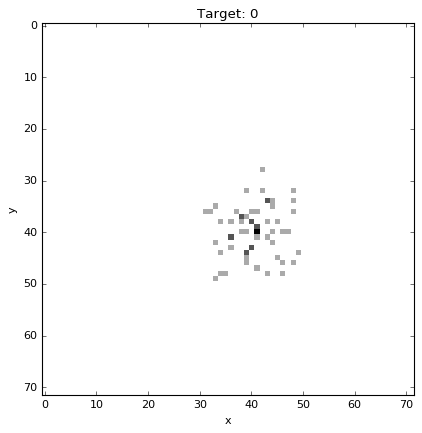

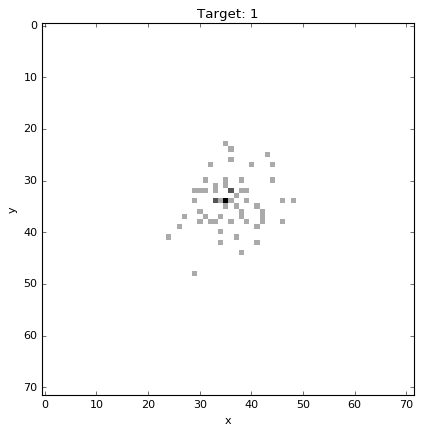

In [3]:
# Just to make sure everything seems to be working correctly

for n, (image, target) in enumerate(images_targets[:2]):
    plt.figure(figsize = (6, 6))
    plt.imshow(image, cmap = plt.cm.gray_r, interpolation = 'nearest')
    plt.autoscale(enable = True, axis = 'both')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Target: %x' %target)
    plt.show()

In [4]:
# Reshape the image to go through classifier
data = all_images.reshape((n_events * 2, -1))

print(data[:n_events])

# Classifier
bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth = 3),
                        algorithm  = "SAMME",
                        n_estimators = 500)

# Train the algorithm
bdt.fit(data[:n_events], targets[:n_events])

[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


AdaBoostClassifier(algorithm='SAMME',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
          learning_rate=1.0, n_estimators=500, random_state=None)

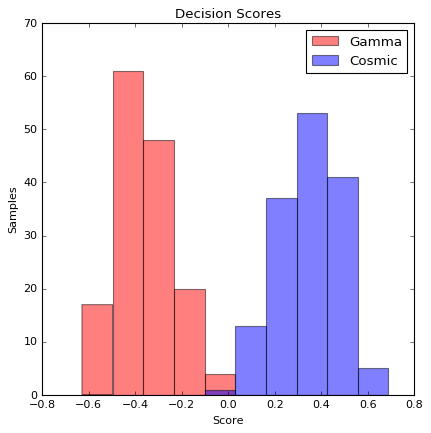

In [5]:
predicted = bdt.predict(data[n_events:])

# Plot the two-class decision scores
twoclass_output = bdt.decision_function(data[n_events:])
plot_range = (twoclass_output.min(), twoclass_output.max())
class_names = "Gamma", "Cosmic"
plot_colors = "rb"
plt.figure(figsize = (6, 6))

for o, n, c in zip(range(2), class_names, plot_colors):
    plt.hist(twoclass_output[targets[:n_events] == o],
             bins=10,
             range=plot_range,
             facecolor=c,
             label='%s' % n, # This is a useful tool
             alpha=.5,
             edgecolor='k')
    
plt.legend(loc='upper right')
plt.ylabel('Samples')
plt.xlabel('Score')
plt.title('Decision Scores')

plt.show()